In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import networkx as nx
from collections import Counter

In [7]:
# Read the artists_by_genre.csv file into a DataFrame
df = pd.read_csv('artists_by_genre.csv')


In [8]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())
print("\nDataFrame Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())




DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494763 entries, 0 to 494762
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   artist_id    494763 non-null  object
 1   artist_name  494756 non-null  object
 2   genre        494763 non-null  object
 3   popularity   494763 non-null  int64 
 4   followers    494763 non-null  int64 
 5   genres       494714 non-null  object
 6   spotify_url  494763 non-null  object
dtypes: int64(2), object(5)
memory usage: 26.4+ MB
None

DataFrame Shape: (494763, 7)

Missing Values:
artist_id       0
artist_name     7
genre           0
popularity      0
followers       0
genres         49
spotify_url     0
dtype: int64



Summary Statistics for Numerical Columns:
          popularity     followers
count  494763.000000  4.947630e+05
mean       22.732654  1.874713e+05
std        20.008957  1.649442e+06
min         0.000000  0.000000e+00
25%         4.000000  3.900000e+02
50%        19.000000  2.919000e+03
75%        37.000000  2.446900e+04
max       100.000000  1.325675e+08

Genre Distribution:
genre
zydeco                    100
italian folk              100
trap                      100
israeli rock              100
israeli techno            100
                         ... 
ilocano pop                22
french rockabilly          18
lata                       15
dansk comedy               14
albanian iso polyphony     13
Name: count, Length: 6286, dtype: int64

Unique Genre Tags in 'genres' column:
rock                 2186
indie rock           1693
alternative metal    1662
alternative rock     1517
classic rock         1500
indietronica         1484
singer-songwriter    1439
metal                143

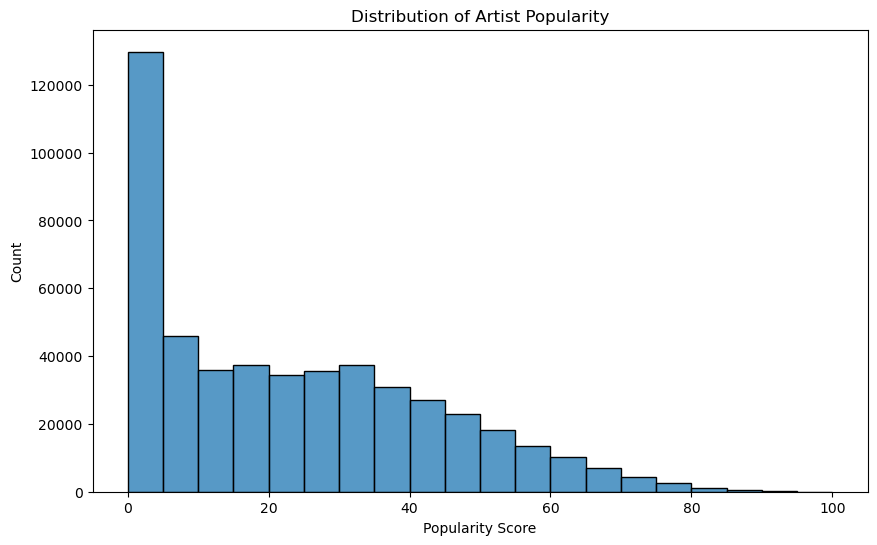

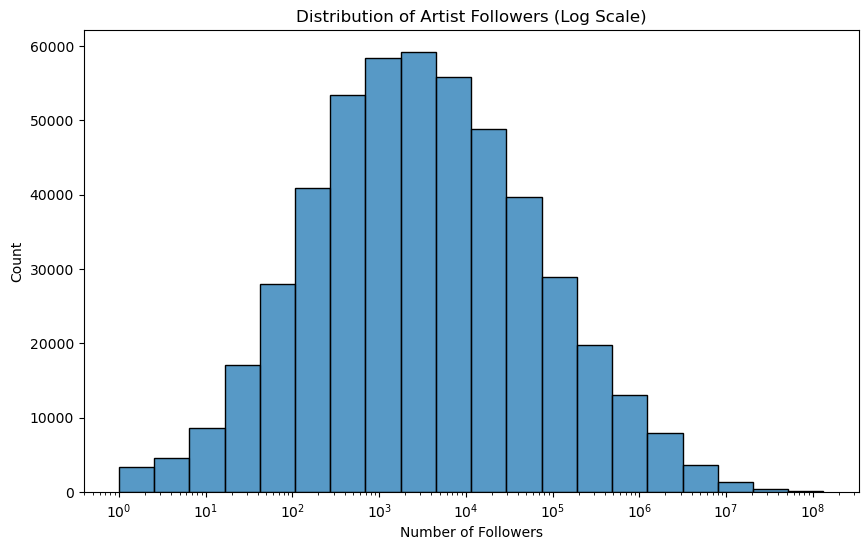

In [11]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display unique genres in the 'genres' column (artist's full genre list)
print("\nUnique Genre Tags in 'genres' column:")
# Fill NaN values with an empty string before splitting
all_genres = [g for genres in df['genres'].fillna('').str.split(',') for g in genres]
genre_tag_counts = pd.Series(all_genres).value_counts().head(20)
print(genre_tag_counts)

# Display popularity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', bins=20)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.show()

# Display followers distribution (using log scale due to potential skewness)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='followers', bins=20, log_scale=True)
plt.title('Distribution of Artist Followers (Log Scale)')
plt.xlabel('Number of Followers')
plt.ylabel('Count')
plt.show()
